# [NLP-01] Text Data



# LMS

##1.환경설정

In [1]:
! pip install --upgrade pip
! pip install konlpy        # Python 3.x

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /tmp/mecab-python-0.996
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mecab-python: filename=mecab_python-0.996_ko_0.9.2-cp37-cp37m-linux_x86_64.whl size=141802 sha256=851673e007453891a381b28059e35c982ee78d87326eaa6b6935a1a4b8155755
  Stored in directory: /root/.cache/pip/wheels/40/7b/9f/2922869bef86c3354ae7034f7a3647c573ee1997c2dad0290a
Failed to build mecab-python
  Attempting uninstall: mecab-python
    Found existing installation: mecab-python 0.996-ko-0.9.2
    Uninstalling mecab-python-0.996-ko-0.9.2:
      Successfully uninstalled mecab-python-0.996-ko-0.9.2
  Running setup.py install for mecab-python: started
  Running setup.py install for mecab-python: finished with status 'done'


  DEPRECATION: mecab-python was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. Discussion can be found at https://github.com/pypa/pip/issues/8368


In [3]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


##  2.데이터 다운로드 및 분석

### import **library**

In [4]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [5]:
! wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz


--2022-10-04 08:31:29--  https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz [following]
--2022-10-04 08:31:29--  https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8718893 (8.3M) [application/octet-stream]
Saving to: ‘korean-english-park.train.tar.gz.6’

kore

In [6]:
! tar -xzvf korean-english-park.train.tar.gz

korean-english-park.train.en
korean-english-park.train.ko


In [7]:
! wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
! tar -xzvf korean-english-park.train.tar.gz

--2022-10-04 08:31:30--  https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz [following]
--2022-10-04 08:31:31--  https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8718893 (8.3M) [application/octet-stream]
Saving to: ‘korean-english-park.train.tar.gz.7’

kore

### Read Data

In [8]:
import os
path_to_file = '/content/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100:20]: print(">>", sen)

# print("Example:")
# for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


### EDA

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


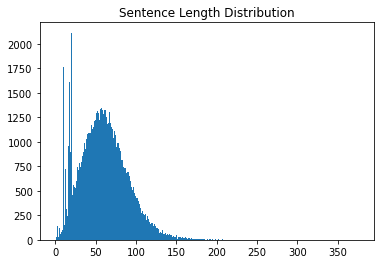

In [9]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

* 길이 확인  함수 

In [10]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return


> 가장 짧은 문장 : 노이즈 판명

In [11]:
check_sentence_with_length(raw, 1)

’


> 가장 긴 문장 : 중복된 문장

In [12]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [13]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

> 중복 제거 !! : Set () 활용 


*순서가 중요 하지 않을 때만 사용

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


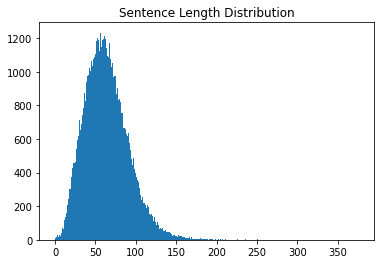

In [14]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

### 길이 한정 !
max_len = 150

min_len = 10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


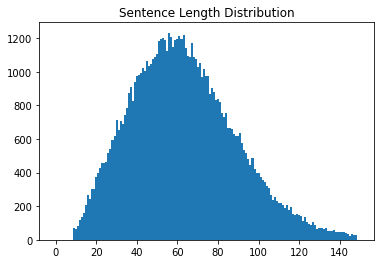

In [15]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

##3.공백 기반 토큰화
정제된 데이터를 공백 기반으로 토큰화하여 list에 저장한 후, 아래 tokenize() 함수를 사용해 단어 사전과 Tensor 데이터를 얻으세요! 

### Tokenizer

In [16]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

### 공백기반 토근화

In [17]:
# 정제된 데이터를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해 보세요.
 
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

In [18]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


### 단어사전 생성

In [19]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


##4.텍스트기반 토큰화

In [20]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보세요. 
# Hint : mecab.morphs()를 사용해서 형태소분석을 합니다.
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [21]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


In [22]:
# Case 1 : tokenizer.sequences_to_texts()

texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

뉴욕 증시 와 주주 들 은 양 이 야후 와 마이크 로 소프트 사 의 인수 가 합의 달성 을 하 지 못했 다고 비난 했 다 .


In [23]:
# Case 2 : tokenizer.index_word

sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

뉴욕 증시 와 주주 들 은 양 이 야후 와 마이크 로 소프트 사 의 인수 가 합의 달성 을 하 지 못했 다고 비난 했 다 . 


# Project : Setence Piece 사용하기 

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

print(tf.__version__)
print(np.__version__)
print(plt.__version__)
print(konlpy.__version__)

2.8.2
1.21.6
3.2.2
0.6.0


## Step 1. SentencePiece 설치하기

In [25]:
! pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Step 2. SentencePiece 모델 학습

In [26]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [27]:
import sentencepiece as spm
import os
temp_file = '/content/drive/MyDrive/Aiffel_data/NLP/[NLP-01]/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

-rw-r--r-- 1 root root 376837 Oct  4 08:32 korean_spm.model
-rw-r--r-- 1 root root 146218 Oct  4 08:32 korean_spm.vocab


❤️ unigram: -1 bigram : 1

In [28]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',-1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1243, 11, 302, 7, 3608, 11, 287, 38, 3]
['▁아', '버', '지', '가', '방', '에', '들', '어', '가', '신', '다', '.']
아버지가방에들어가신다.


##Step 3. Tokenizer 함수 작성

1.매개변수로 토큰화된 문장의 list를 전달하는 대신 온전한 문장의 list 를 전달합니다.

2.생성된 vocab 파일을 읽어와 { <word> : <idx> } 형태를 가지는 word_index 사전과 { <idx> : <word>} 형태를 가지는 index_word 사전을 생성하고 함께 반환합니다.

3.리턴값인 tensor 는 앞의 함수와 동일하게 토큰화한 후 Encoding된 문장입니다. 바로 학습에 사용할 수 있게 Padding은 당연히 해야겠죠?

In [29]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [30]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1954 5665    5    4 7975 1988    3    0    0    0    0    0    0    0]
 [ 107 1642  101    4    0  417   11    4   14    0 1974    3    3    3]]


## Step 4. 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해 보기
KoNLPy에 있는 Mecab, kkma, Okt 등과 비교해보세요.

* 네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하기
* 학습된 모델로 sp_tokenize() 메소드 구현하기
* 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델을 재학습하기
* KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기
* SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기

### 1) 코퍼스 분석

#### 데이터1)

In [31]:
# import pandas as pd

# # 데이터를 읽어봅시다. 
# train_data = pd.read_table('/content/drive/MyDrive/Aiffel_data/Exp_Stage/Exp08_NLP2/ratings_train.txt')
# test_data = pd.read_table('/content/drive/MyDrive/Aiffel_data/Exp_Stage/Exp08_NLP2/ratings_train.txt')

# train_data.head()

In [32]:
# print('리뷰 개수 :',len(train_data)) # 리뷰 개수 출력

In [33]:
# print(train_data.dtypes)

In [34]:
# train_data.document

In [35]:
# for i in train_data.document:
#   if type(i) is not str:
#     print(i)

In [36]:
# train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
# print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

In [37]:
# min_len = 999
# max_len = 0
# sum_len = 0

# for sen in train_data.document:
#     length = len(sen)
#     if min_len > length: min_len = length
#     if max_len < length: max_len = length
#     sum_len += length

# print("문장의 최단 길이:", min_len)
# print("문장의 최장 길이:", max_len)
# print("문장의 평균 길이:", sum_len // len(raw))

# sentence_length = np.zeros((max_len), dtype=np.int)

# for sen in train_data.document:
#     sentence_length[len(sen)-1] += 1

# plt.bar(range(max_len), sentence_length, width=1.0)
# plt.title("Sentence Length Distribution")
# plt.show()

#### 데이터2)

In [38]:
import sentencepiece as spm
import pandas as pd
import urllib.request
import csv
import matplotlib.pyplot as plt 

In [39]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f228d1ef810>)

In [40]:
naver_df = pd.read_table('ratings.txt')
naver_df[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [41]:
print('리뷰 개수 :',len(naver_df)) # 리뷰 개수 출력

리뷰 개수 : 200000


In [42]:
print(naver_df.dtypes)

id           int64
document    object
label        int64
dtype: object


* NULL 값 제거 

In [43]:
print(naver_df.isnull().values.any()) # Null 값 여부 확인

True


In [44]:
naver_df = naver_df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(naver_df.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [45]:
type(naver_df.document)

pandas.core.series.Series

In [46]:
naver_df.document

0                                       어릴때보고 지금다시봐도 재밌어요ㅋㅋ
1         디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...
2                      폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.
3         와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...
4                               안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.
                                ...                        
199995                                       포켓 몬스터 짜가 ㅡㅡ;;
199996                                                쓰.레.기
199997                    완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.
199998                  왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ
199999                                      포풍저그가나가신다영차영차영차
Name: document, Length: 199992, dtype: object

문장의 최단 길이: 1
문장의 최장 길이: 142
문장의 평균 길이: 74


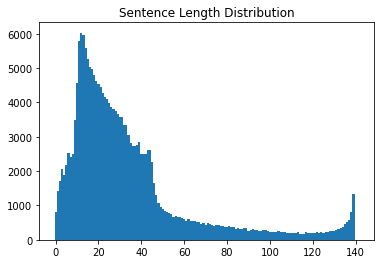

In [47]:
min_len = 999
max_len = 0
sum_len = 0

for sen in naver_df.document:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in naver_df.document:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

> 길이 확인 함수 

In [48]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return


* 가장 짧은 문장 

In [49]:
check_sentence_with_length(naver_df.document, 1)

굿
핡
굿
휴
굿
시
ㅋ
ㅇ
굿
‥
O
굿
굿
굿
갑
ㅎ
굿
.
올
굿
헷
g
굿
♥
.
짱
짱
ㅆ
.
굿
짱
굿
.
굿
굿
굿
.
굿
짱
굳
굿
잼
굿
짱
굿
굿
ㅎ
굿
굿
굿
ㅁ
굳
굿
굿
?
ㅎ
굿
굿
.
짱
ㅇ
ㅋ
애
굿
ㅋ
굿
?
짱
.
흠
굿
ㅋ
!
굿
찜
b
굿
굳
짱
짱
짱
짱
굿
굿
짱
굿
,
♥
굳
.
굿
굳
ㅎ
굿
굿
.
굿
굳
굿
굿
굿


* 가장 긴 문장 

In [50]:
check_sentence_with_length(naver_df.document, 142)

영화 초반을 보면서 ' 좀 허항된 . 황당한 코믹스런 ' 연출이 되겠다란 생각을 하고 보기시작했는데 .. 연주가 처음 시작되는 부분에서 저도 모르게 눈가가 초촉해 지기시작하더군요 .. 이유는 모르겠네요 ... 자유에 대한 갈증과 박해에 대한 내용을 &gt


In [51]:
# for idx, _sum in enumerate(sentence_length):
#     # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
#     if _sum > 1500:
#         print("Outlier Index:", idx+1)

In [52]:
# check_sentence_with_length(naver_df.document, 27)

In [53]:
cleaned_df = naver_df.drop_duplicates(subset=['document'])

In [54]:
len(cleaned_df)

194543

In [55]:
type(cleaned_df)

pandas.core.frame.DataFrame

In [56]:
cleaned_df

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [57]:
cleaned_corpus = cleaned_df.document

In [58]:
cleaned_corpus

0                                       어릴때보고 지금다시봐도 재밌어요ㅋㅋ
1         디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...
2                      폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.
3         와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...
4                               안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.
                                ...                        
199995                                       포켓 몬스터 짜가 ㅡㅡ;;
199996                                                쓰.레.기
199997                    완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.
199998                  왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ
199999                                      포풍저그가나가신다영차영차영차
Name: document, Length: 194543, dtype: object

Data Size: 194543
문장의 최단 길이: 1
문장의 최장 길이: 142
문장의 평균 길이: 36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


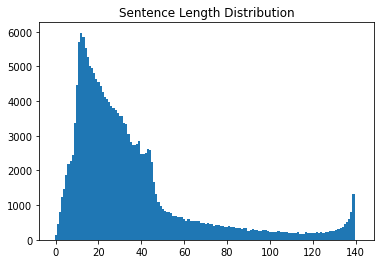

In [59]:
min_len = 999
max_len = 0
sum_len = 0

# cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_df.document:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_df.document))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [60]:

filtered_df = cleaned_df[(cleaned_df['document'].map(len) < 130)]


In [61]:
len(filtered_df)

189050

In [62]:
filtered_corpus = filtered_df.document

문장의 최단 길이: 1
문장의 최장 길이: 142
문장의 평균 길이: 37


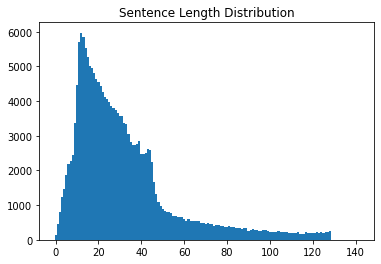

In [63]:
# max_len = 80
# min_len = 0

# # 길이 조건에 맞는 문장만 선택합니다.
# # filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]
# filtered_corpus = cleaned_corpus[(cleaned_corpus['document'] < max_len) & (cleaned_corpus['document'] >= min_len)]


print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(filtered_corpus))
# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

1) split - tokenizer 
2) tokenizer - split 

1) = 2) 똑같다. 

###2) 데이터 전처리 
* 데이터의 중복 제거
*  NaN 결측치 제거

In [64]:
# 위에 있어요!

### 3) SentencePiece 적용

SentencePiece 모델 학습

In [65]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [66]:
import sentencepiece as spm
import os
# temp_file = '/content/drive/MyDrive/Aiffel_data/NLP/[NLP-01]/korean-english-park.train.ko.temp'

vocab_size = 8000

with open('naver_review.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(naver_df['document']))

# with open(temp_file, 'w') as f:
#     for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
#         f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format('naver_review.txt', vocab_size)    
)
#위 Train에서  --model_type=unigram 이 디폴트 적용되어 있습니다. --model_type=bpe 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

-rw-r--r-- 1 root root 374735 Oct  4 08:33 korean_spm.model
-rw-r--r-- 1 root root 144223 Oct  4 08:33 korean_spm.vocab


###4) 토크나이저 구현 및 동작

In [67]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre')

    return tensor, word_index, index_word

In [68]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[   0    0    0    0    0    0    0 1954 5665    5    4 7975 1988    3]
 [ 107 1642  101    4    0  417   11    4   14    0 1974    3    3    3]]


In [69]:
tensor, word_index, index_word = sp_tokenize(s, filtered_corpus)

In [70]:
tensor

array([[   0,    0,    0, ...,   71,  514,    0],
       [   0,    0,    0, ...,    3,  622,    3],
       [   0,    0,    0, ..., 4857,  216,   29],
       ...,
       [   0,    0,    0, ...,   78, 3576,    3],
       [   0,    0,    0, ...,   11,    4,    0],
       [   0,    0,    0, ...,  248,  822,  248]], dtype=int32)

In [71]:
len(tensor)

189050

In [72]:
# label = filtered_df.label

In [73]:
label = np.array(filtered_df['label'])

In [74]:
len(label)

189050

In [75]:
label

array([1, 1, 1, ..., 0, 0, 0])

### 5) 모델 정의, 학습 

train validation test 8: 1 : 1 

In [76]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터) # 깊을수록 과적합 / 연산량 증가 

# model 설계 - LSTM

model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_lstm.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model_lstm.add(tf.keras.layers.Dense(8, activation='relu'))
model_lstm.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.


model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


* train- test split

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tensor, 
                                                    label, 
                                                    test_size=0.1, 
                                                    random_state=42)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  170145 , X_test 개수:  18905


* train_validation 분리

In [78]:
# validation set 20000건 분리
X_val = X_train[:20000]   
Y_val = y_train[:20000]

# validation set을 제외한 나머지 
partial_X_train = X_train[20000:]  
partial_Y_train = y_train[20000:]

print(partial_X_train.shape)
print(partial_Y_train.shape)

(150145, 115)
(150145,)


In [79]:
model_lstm.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model_lstm.fit(partial_X_train,
                    partial_Y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, Y_val),
                    verbose=1)

Epoch 1/20
294/294 [==============================] - 7s 11ms/step - loss: 0.5349 - accuracy: 0.7437 - val_loss: 0.4230 - val_accuracy: 0.8163
Epoch 2/20
294/294 [==============================] - 3s 9ms/step - loss: 0.4005 - accuracy: 0.8252 - val_loss: 0.4038 - val_accuracy: 0.8202
Epoch 3/20
294/294 [==============================] - 3s 9ms/step - loss: 0.3796 - accuracy: 0.8350 - val_loss: 0.3925 - val_accuracy: 0.8260
Epoch 4/20
294/294 [==============================] - 3s 9ms/step - loss: 0.3678 - accuracy: 0.8402 - val_loss: 0.3888 - val_accuracy: 0.8251
Epoch 5/20
294/294 [==============================] - 3s 9ms/step - loss: 0.3576 - accuracy: 0.8455 - val_loss: 0.3853 - val_accuracy: 0.8267
Epoch 6/20
294/294 [==============================] - 3s 9ms/step - loss: 0.3482 - accuracy: 0.8494 - val_loss: 0.3830 - val_accuracy: 0.8285
Epoch 7/20
294/294 [==============================] - 3s 9ms/step - loss: 0.3400 - accuracy: 0.8533 - val_loss: 0.3840 - val_accuracy: 0.8278
Epoch

In [80]:
results = model_lstm.evaluate(X_test,  y_test, verbose=2)

print(results)

591/591 - 2s - loss: 0.4009 - accuracy: 0.8363 - 2s/epoch - 4ms/step
[0.4009084403514862, 0.8363395929336548]


### 6) 성능 향상 - Mecab
- Mecab 

In [81]:
import pandas as pd

# 데이터를 읽어봅시다. 
train_data = pd.read_table('/content/drive/MyDrive/Aiffel_data/Exp_Stage/Exp08_NLP2/ratings_train.txt')
test_data = pd.read_table('/content/drive/MyDrive/Aiffel_data/Exp_Stage/Exp08_NLP2/ratings_train.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [82]:
len(test_data)

150000

In [83]:
len(train_data)

150000

In [84]:
from konlpy.tag import Mecab
import numpy as np
from collections import Counter
import tensorflow as tf

tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(num_words-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data) 


In [85]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

4672470
문장길이 평균 :  15.981687211831826
문장길이 최대 :  116
문장길이 표준편차 :  12.824686694216712


pad_sequences maxlen :  48
전체 문장의 0.9549465734495355%가 maxlen 설정값 이내에 포함됩니다. 


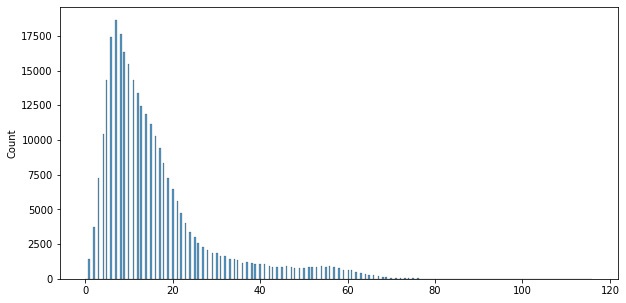

In [86]:
# 데이터셋 내 문장 길이 분포
# 적절한 최대 문장 길이 지정 


total_data_text = list(X_train) + list(X_test)

# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
num_tokens_count = np.bincount(num_tokens)

# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다.
print(np.sum(num_tokens))

print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))
print('\n')

# 예를들어, 최대 길이를 (평균 + 2.5*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2.5* np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (10,5))
sns.histplot(num_tokens)
plt.show()

In [87]:
# 패딩 추가
import tensorflow as tf
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(X_train.shape)

(146182, 48)


In [88]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터) # 깊을수록 과적합 / 연산량 증가 

# model 설계 - LSTM

model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_lstm.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model_lstm.add(tf.keras.layers.Dense(8, activation='relu'))
model_lstm.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.


model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          160000    
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


In [89]:
# validation set 20000건 분리
X_val = X_train[:20000]   
Y_val = y_train[:20000]

# validation set을 제외한 나머지 
partial_X_train = X_train[20000:]  
partial_Y_train = y_train[20000:]

print(partial_X_train.shape)
print(partial_Y_train.shape)

(126182, 48)
(126182,)


In [90]:
model_lstm.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model_lstm.fit(partial_X_train,
                    partial_Y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, Y_val),
                    verbose=1)

Epoch 1/20
247/247 [==============================] - 4s 10ms/step - loss: 0.5742 - accuracy: 0.6577 - val_loss: 0.3824 - val_accuracy: 0.8398
Epoch 2/20
247/247 [==============================] - 2s 8ms/step - loss: 0.3545 - accuracy: 0.8496 - val_loss: 0.3511 - val_accuracy: 0.8458
Epoch 3/20
247/247 [==============================] - 2s 8ms/step - loss: 0.3199 - accuracy: 0.8659 - val_loss: 0.3500 - val_accuracy: 0.8482
Epoch 4/20
247/247 [==============================] - 2s 8ms/step - loss: 0.3037 - accuracy: 0.8704 - val_loss: 0.3456 - val_accuracy: 0.8500
Epoch 5/20
247/247 [==============================] - 2s 8ms/step - loss: 0.2909 - accuracy: 0.8745 - val_loss: 0.3552 - val_accuracy: 0.8479
Epoch 6/20
247/247 [==============================] - 2s 7ms/step - loss: 0.2795 - accuracy: 0.8767 - val_loss: 0.3717 - val_accuracy: 0.8466
Epoch 7/20
247/247 [==============================] - 2s 8ms/step - loss: 0.2723 - accuracy: 0.8779 - val_loss: 0.3802 - val_accuracy: 0.8465
Epoch

In [91]:
results = model_lstm.evaluate(X_test,  y_test, verbose=2)

print(results)

4569/4569 - 12s - loss: 0.2315 - accuracy: 0.8978 - 12s/epoch - 3ms/step
[0.23152075707912445, 0.8978260159492493]


# 비교 
Sentencepiece : loss: 0.4009 - accuracy: 0.8363 
Mecab : 4569/4569 - 12s - loss: 0.2315 - accuracy: 0.8978 

Accuracy 측면에서 Mecab이 6%가량 더 높은 정확도를 출력하였다.  

# 회고

### - 이번 프로젝트에서 **어려웠던 점**.

* data형식을 dataframe 에서 tensor로 바꾸기 

### - 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.


### - 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.

첫번째 시도 accuracy 50 초반

   -padding = pre 로 변경 
   -train-validation-test : 8:1:1
   -epoch = 20

두번째 시도 accurayc 83


>#### **루브릭평가 지표**
>|번호|평가문항|상세기준|
>|:---:|---|---|
>|1| SentencePiece를 이용하여 모델을 만들기까지의 과정이 정상적으로 진행되었는가?|**코퍼스 분석, 전처리, SentencePiece 적용, 토크나이저 구현 및 동작**이 빠짐없이 진행되었다.|
>|2|SentencePiece를 통해 만든 Tokenizer가 자연어처리 모델과 결합하여 동작하는가?| SentencePiece 토크나이저가 적용된 **Text Classifier 모델이 정상적으로 수렴하여 80% 이상의 test accuracy**가 확인되었다.|
>|3|SentencePiece의 **성능을 다각도로 비교분석**하였는가?|SentencePiece 토크나이저를 활용했을 때의 성능을 **다른 토크나이저 혹은 SentencePiece의 다른 옵션의 경우와 비교하여 분석**을 체계적으로 진행하였다.|



### - **자기 다짐**
-판다스 문법 다시 보기 

-데이터 전처리 통일 유의 하기 ! 



